# Proyecto Final de Statistical Learning 2 
Grupo: Jorge Yxcot, Naomi Lara y Héctor Aragón

In [1]:
import pandas as pd

dataframe = pd.read_csv('laptopData.csv')
print(dataframe)


      Unnamed: 0 Company            TypeName Inches  \
0            0.0   Apple           Ultrabook   13.3   
1            1.0   Apple           Ultrabook   13.3   
2            2.0      HP            Notebook   15.6   
3            3.0   Apple           Ultrabook   15.4   
4            4.0   Apple           Ultrabook   13.3   
...          ...     ...                 ...    ...   
1298      1298.0  Lenovo  2 in 1 Convertible     14   
1299      1299.0  Lenovo  2 in 1 Convertible   13.3   
1300      1300.0  Lenovo            Notebook     14   
1301      1301.0      HP            Notebook   15.6   
1302      1302.0    Asus            Notebook   15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                        

Revisión de Características de la Base de datos de laptops

In [2]:

# Mostrar las primeras 5 filas
print(dataframe.head())

# Información general del dataset
print(dataframe.info())

# Estadísticas descriptivas
print(dataframe.describe())


   Unnamed: 0 Company   TypeName Inches                    ScreenResolution  \
0         0.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1         1.0   Apple  Ultrabook   13.3                            1440x900   
2         2.0      HP   Notebook   15.6                   Full HD 1920x1080   
3         3.0   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4         4.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  

# Revisión de la Base de datos

Unnamed: 0: Parece ser un índice o identificador único para cada registro. Es posible que no necesites esta columna si ya cuentas con índices automáticos proporcionados por herramientas como pandas.

Company: Marca o fabricante del laptop (e.g., Apple, HP).

TypeName: Tipo o categoría del laptop (e.g., Ultrabook, Notebook).

Inches: Tamaño de la pantalla en pulgadas.

ScreenResolution: Resolución de la pantalla.

Cpu: Especificación del procesador.

Ram: Cantidad de memoria RAM.

Memory: Tipo y capacidad de almacenamiento (e.g., SSD, Flash Storage).

Gpu: Tarjeta gráfica o GPU.

OpSys: Sistema operativo.

Weight: Peso del laptop.

Price: Precio del laptop: 
        count: Hay un total de 1273 registros en esta columna.
        mean: El precio promedio de un laptop en este dataset es aproximadamente 59955.81 (la moneda no está especificada, pero supongamos que son unidades monetarias UM).
        std: La desviación estándar es 37332.25 UM, lo que indica que hay una variabilidad considerable en los precios de los laptops.
        min: El laptop más barato cuesta 9270.72 UM.
        25%: El 25% de los laptops cuesta 31914.72 UM o menos.
        50%: La mediana del precio es 52161.12 UM. Esto significa que el 50% de los laptops cuestan menos que este valor y el 50% cuesta más.
        75%: El 75% de los laptops cuesta 79333.39 UM o menos.
        max: El laptop más caro en este dataset cuesta 324954.72 UM.





## Buscar Nulos o casos perdidos

In [3]:
# Busqueda de valores nulos
valores_nulos = dataframe.isnull().sum()
print(valores_nulos)


Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64


In [5]:
#Eliminar Nulos
dataframe.dropna(inplace=True)


In [6]:
#Demostración de elminación de Nulos
valores_nulos = dataframe.isnull().sum()
print(valores_nulos)

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [7]:

#Como afecta la eliminación de filas NULL: no hay impacto 

print(dataframe.describe())


        Unnamed: 0          Price
count  1273.000000    1273.000000
mean    652.674784   59955.814073
std     376.493027   37332.251005
min       0.000000    9270.720000
25%     327.000000   31914.720000
50%     652.000000   52161.120000
75%     980.000000   79333.387200
max    1302.000000  324954.720000


In [8]:
#Eliminar la columna unnamed
dataframe.drop(columns=['Unnamed: 0'], inplace=True)


In [9]:
#Revision:
valores_nulos = dataframe.isnull().sum()
print(valores_nulos)

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64


In [10]:
# Otras librerias requeridas
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
for column in dataframe.select_dtypes(include=['object']):
    print("\nFrecuencias para la columna:", column)
    print(dataframe[column].value_counts())



Frecuencias para la columna: Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: Company, dtype: int64

Frecuencias para la columna: TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: TypeName, dtype: int64

Frecuencias para la columna: Inches
15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: Inches, dtype: int64

Frecuencias para la co

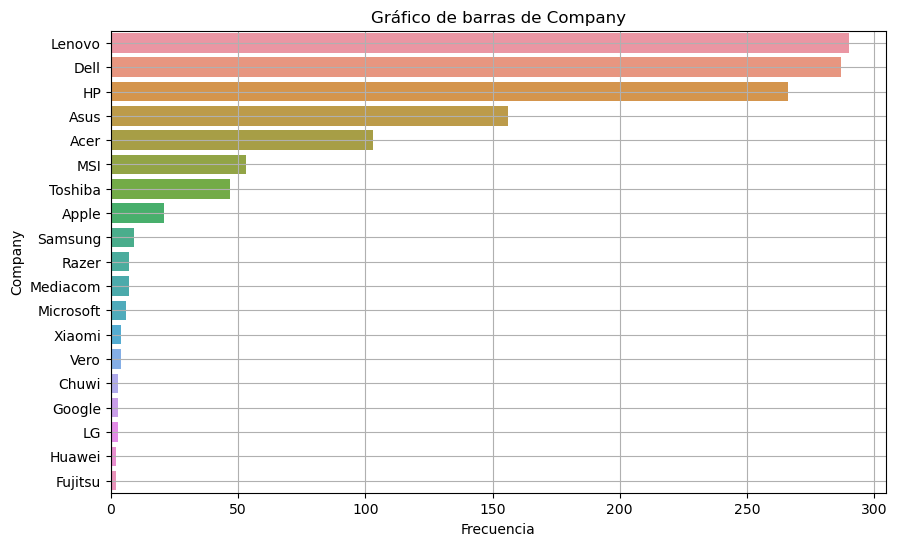

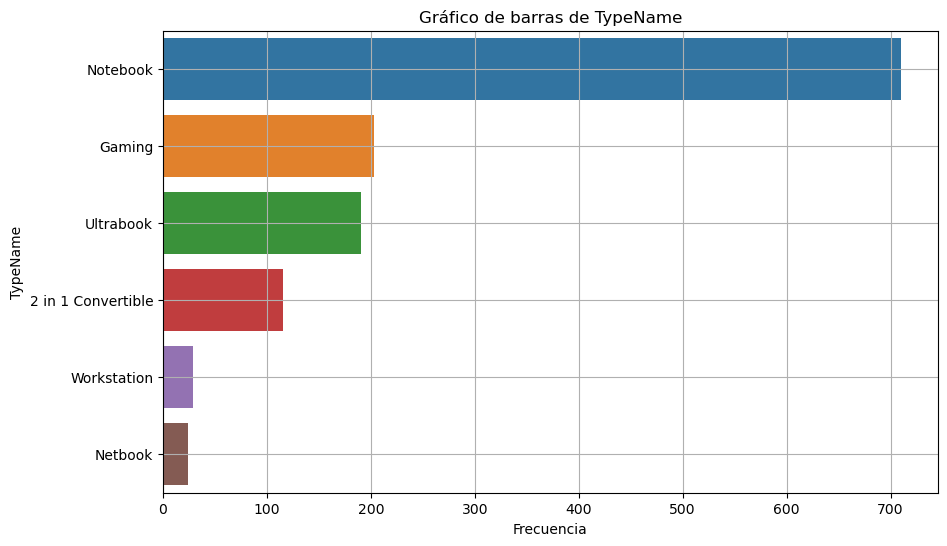

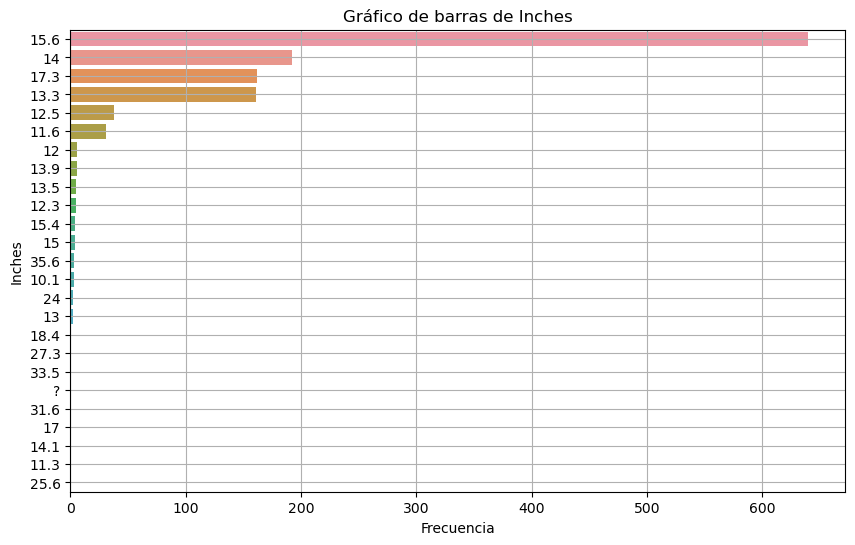

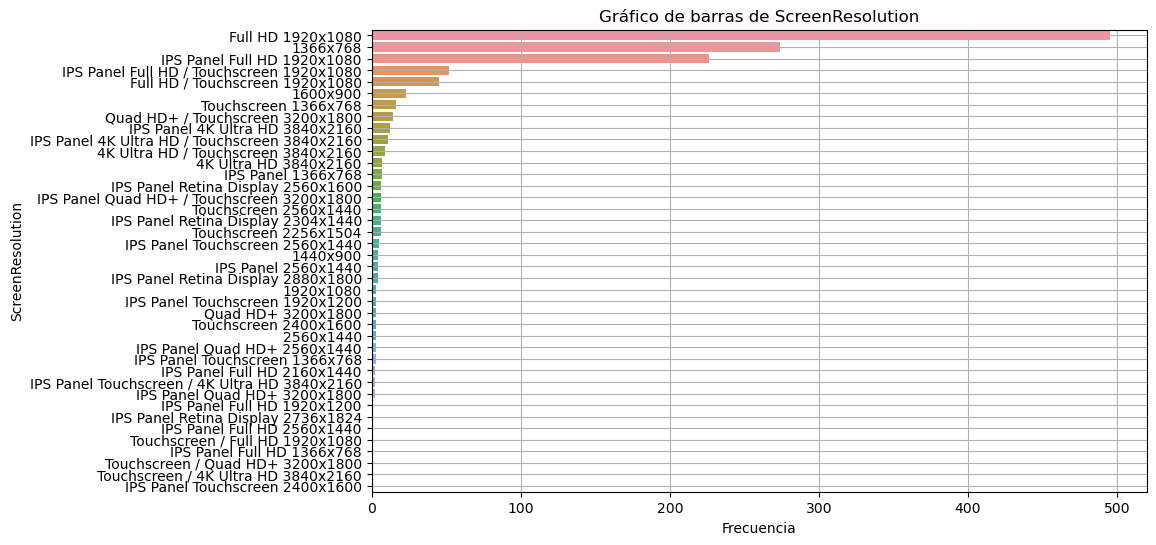

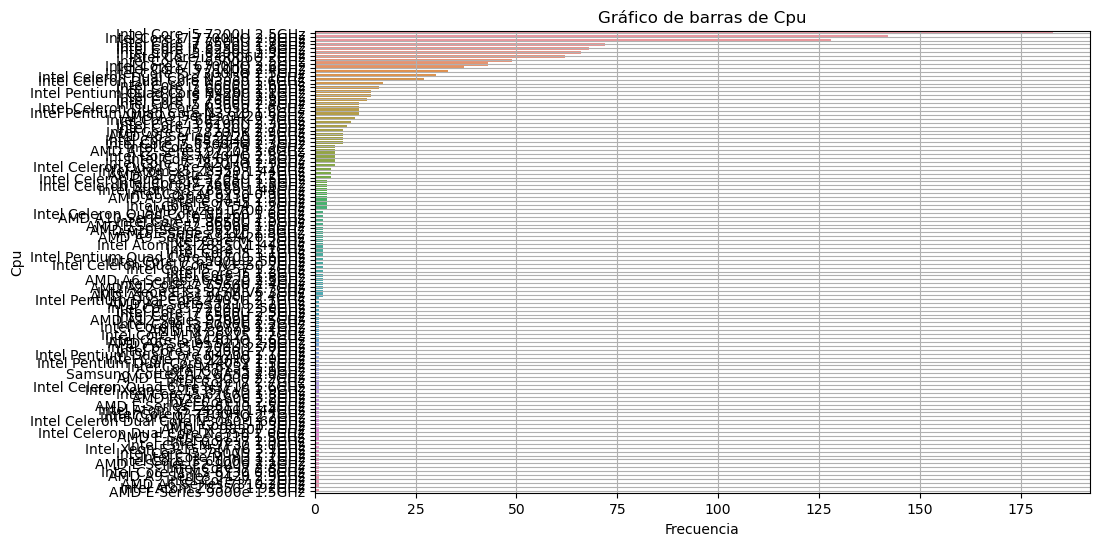

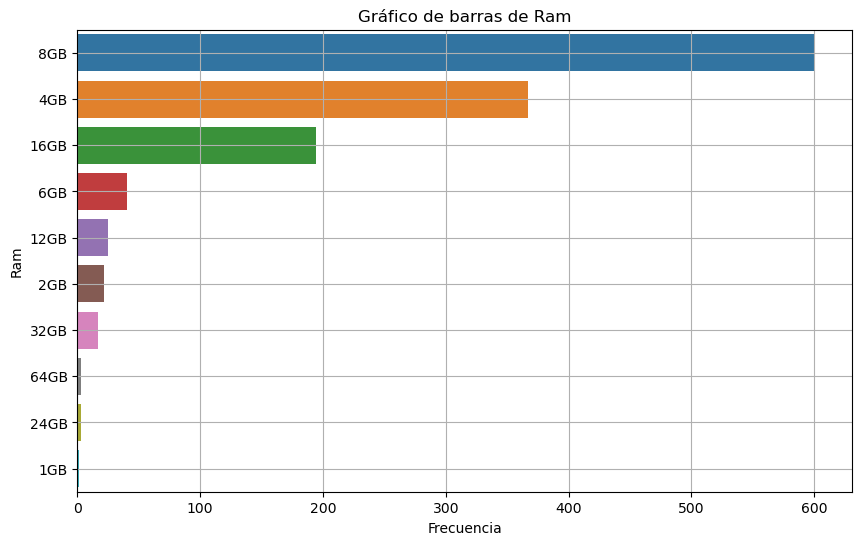

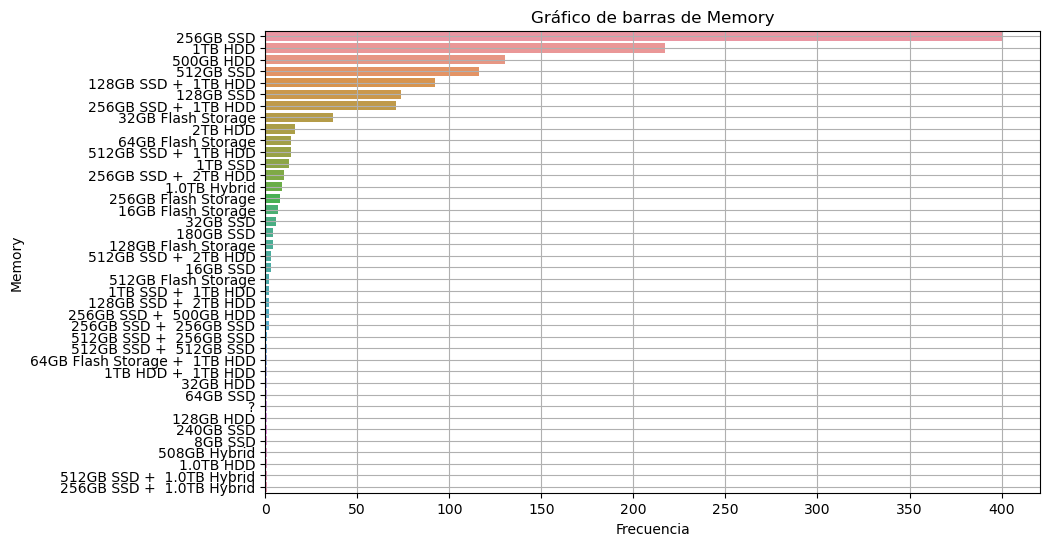

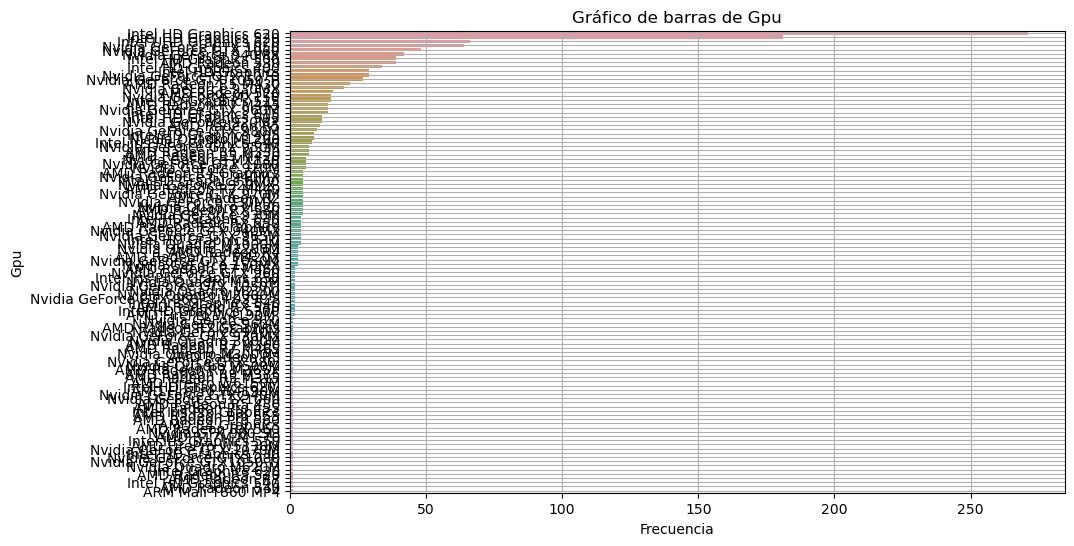

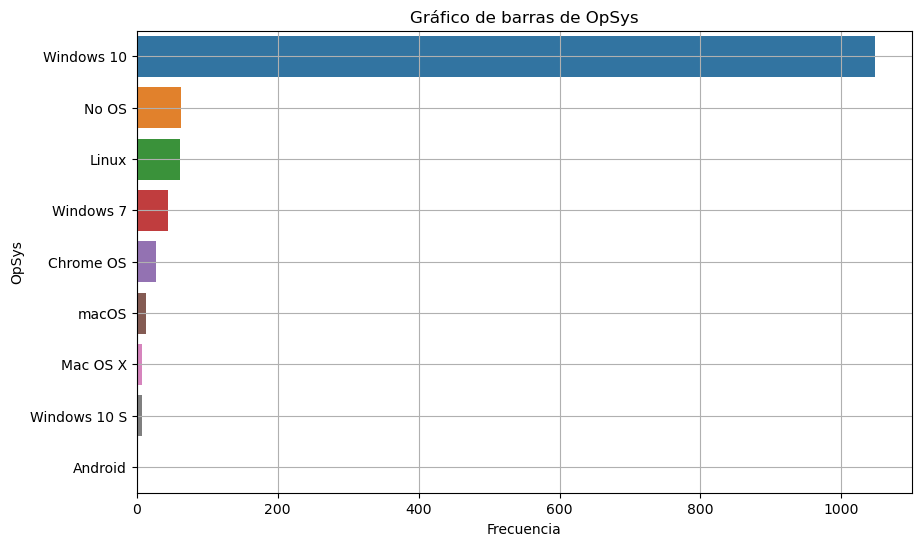

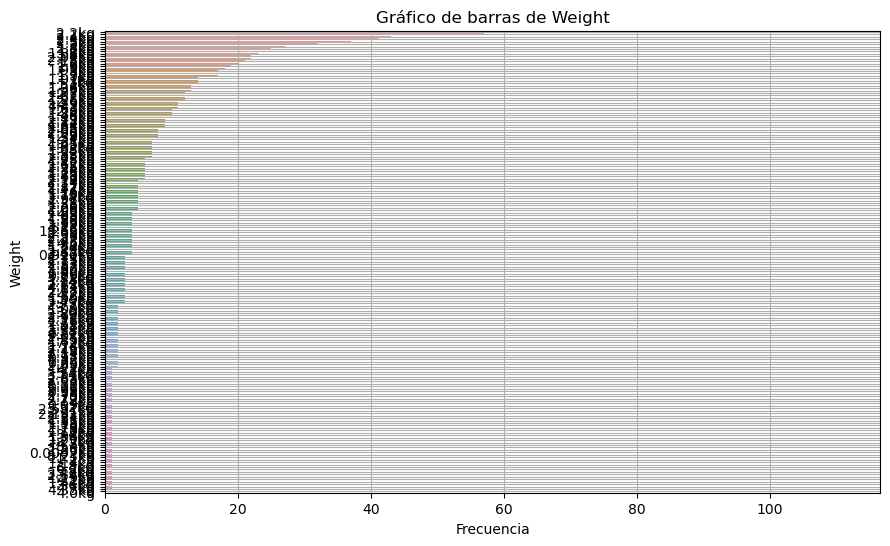

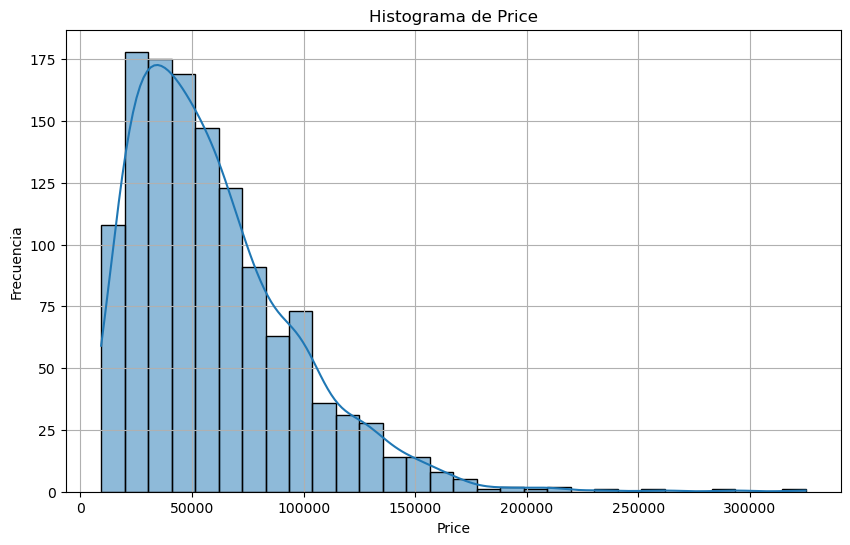

In [12]:
for column in dataframe:
    if dataframe[column].dtype in ['int64', 'float64']:  # Histogramas para columnas numéricas
        plt.figure(figsize=(10, 6))
        sns.histplot(dataframe[column], bins=30, kde=True)  # `kde=True` añade una estimación de densidad al histograma
        plt.title(f'Histograma de {column}')
        plt.xlabel(column)
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()
    else:  # Gráficos de barras para columnas categóricas
        plt.figure(figsize=(10, 6))
        sns.countplot(data=dataframe, y=column, order=dataframe[column].value_counts().index)
        plt.title(f'Gráfico de barras de {column}')
        plt.xlabel('Frecuencia')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()


# Limpieza:

In [13]:

#Cambiando los valores ?
dataframe.replace('?', pd.NA, inplace=True)


In [14]:
frequency_inches = dataframe['Inches'].value_counts()
print(frequency_inches)


15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: Inches, dtype: int64


### Hacer una copia de la Base de Datos

In [18]:
# Hacer una copia de base de datos original
df = dataframe.copy()


### Limpiando la columna Company

In [29]:
df['Company'] = df['Company'].replace('Vero', 'Aourus')

In [30]:
frecuencias = df['Company'].value_counts()
print(frecuencias)

Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Aourus         4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: Company, dtype: int64


### Dividiendo y limpiado la columna Screen Resolution

In [25]:
import re

# Crear una copia de tu dataframe
df = dataframe.copy()

# Inicializar las nuevas columnas
df['IPS'] = 'No'
df['Touchscreen'] = 'No'
df['Resolution_Type'] = None
df['Resolution'] = None

# Función para procesar cada fila de la columna 'ScreenResolution'
def process_resolution(row):
    # Si tiene 'IPS Panel'
    if 'IPS Panel' in row:
        df.at[index, 'IPS'] = 'Yes'
        row = row.replace('IPS Panel', '').strip()
    
    # Si tiene 'Touchscreen'
    if 'Touchscreen' in row:
        df.at[index, 'Touchscreen'] = 'Yes'
        row = row.replace('Touchscreen', '').strip()
    
    # Buscar y asignar el tipo de resolución
    resolution_types = ['4K Ultra HD', 'Full HD', 'Quad HD+', 'Retina Display']
    for r_type in resolution_types:
        if r_type in row:
            df.at[index, 'Resolution_Type'] = r_type
            row = row.replace(r_type, '').strip()
            break  # Romper el ciclo una vez se ha encontrado el tipo de resolución

    # Asignar la resolución específica
    resolution_pattern = re.compile(r"\d+x\d+")
    match = resolution_pattern.search(row)
    if match:
        df.at[index, 'Resolution'] = match.group()

# Aplicar la función
for index, row in df['ScreenResolution'].iteritems():
    process_resolution(row)

# Visualizar el DataFrame después de procesar
print(df[['ScreenResolution', 'IPS', 'Touchscreen', 'Resolution_Type', 'Resolution']].head())


                     ScreenResolution  IPS Touchscreen Resolution_Type  \
0  IPS Panel Retina Display 2560x1600  Yes          No  Retina Display   
1                            1440x900   No          No            None   
2                   Full HD 1920x1080   No          No         Full HD   
3  IPS Panel Retina Display 2880x1800  Yes          No  Retina Display   
4  IPS Panel Retina Display 2560x1600  Yes          No  Retina Display   

  Resolution  
0  2560x1600  
1   1440x900  
2  1920x1080  
3  2880x1800  
4  2560x1600  


C:\Users\halej\AppData\Local\Temp\ipykernel_12260\732047206.py:39: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in df['ScreenResolution'].iteritems():


In [26]:
print(df)

     Company            TypeName Inches  \
0      Apple           Ultrabook   13.3   
1      Apple           Ultrabook   13.3   
2         HP            Notebook   15.6   
3      Apple           Ultrabook   15.4   
4      Apple           Ultrabook   13.3   
...      ...                 ...    ...   
1298  Lenovo  2 in 1 Convertible     14   
1299  Lenovo  2 in 1 Convertible   13.3   
1300  Lenovo            Notebook     14   
1301      HP            Notebook   15.6   
1302    Asus            Notebook   15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300           

### Limpiando y ajustando la columna Inches

In [27]:
# Imputar los NaN con el valor de la media
df['Inches'].fillna(15, inplace=True)

# Convertir la columna a float (si es que no lo es ya)
df['Inches'] = df['Inches'].astype(float)



In [28]:
# Verificando los cambios
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1272 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   object 
 10  Price             1273 non-null   float64
 11  IPS               1273 non-null   object 
 12  Touchscreen       1273 non-null   object 
 13  Resolution_Type   912 non-null    object 
 14  Resolution        1273 non-null   object 
dtypes: float64(2), object(13)
memory usage: 191.4+ KB
None


### Limpiando y separando la columna CPU

In [32]:
def categorize_cpu_manufacturer(cpu):
    if 'AMD' in cpu:
        return 'AMD'
    elif 'Intel' in cpu:
        return 'Intel'
    elif 'Samsung' in cpu:
        return 'Samsung'
    else:
        return 'Others'

df['CPU_Manufacturer'] = df['Cpu'].apply(categorize_cpu_manufacturer)

def categorize_cpu_series(cpu):
    intel_series = ["Intel Core i3", "Intel Core i5", "Intel Core i7", "Intel Core i9", "Intel Core M", "Intel Xeon", "Intel Pentium", "Intel Celeron", "Intel Atom"]
    amd_series = ["AMD A-Series", "AMD FX", "AMD Ryzen", "AMD E-Series"]
    
    for series in intel_series:
        if series in cpu:
            return series
    for series in amd_series:
        if series in cpu:
            return series

    return 'Others'

df['CPU_Series'] = df['Cpu'].apply(categorize_cpu_series)

import re

def categorize_cpu_speed(cpu):
    speed_pattern = re.compile(r'(\d+\.\d+)GHz')
    match = speed_pattern.search(cpu)
    
    if match:
        speed = float(match.group(1))
        if speed < 2:
            return 'Baja'
        elif 2 <= speed <= 3:
            return 'Media'
        else:
            return 'Alta'
    else:
        return 'Unknown'

df['CPU_Speed_Range'] = df['Cpu'].apply(categorize_cpu_speed)

def extract_cpu_identifier(cpu):
    speed_pattern = re.compile(r'(\d+\.\d+)GHz')
    if speed_pattern.search(cpu):
        return speed_pattern.search(cpu).group(1) + "GHz"
    else:
        return 'Unknown'

df['CPU_Identifier'] = df['Cpu'].apply(extract_cpu_identifier)


In [33]:
# Verificando los cambios
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1272 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   object 
 10  Price             1273 non-null   float64
 11  IPS               1273 non-null   object 
 12  Touchscreen       1273 non-null   object 
 13  Resolution_Type   912 non-null    object 
 14  Resolution        1273 non-null   object 
 15  CPU_Manufacturer  1273 non-null   object 
 16  CPU_Series        1273 non-null   object 


### Limpiando la columna RAM y convertirla a numero

In [34]:
# Remover "GB" y convertir a int
df['Ram'] = df['Ram'].str.replace('GB', '').astype(int)


In [35]:
# Verificando los cambios
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1272 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   object 
 10  Price             1273 non-null   float64
 11  IPS               1273 non-null   object 
 12  Touchscreen       1273 non-null   object 
 13  Resolution_Type   912 non-null    object 
 14  Resolution        1273 non-null   object 
 15  CPU_Manufacturer  1273 non-null   object 
 16  CPU_Series        1273 non-null   object 


### Limpieza y Separador de la Columna Memory en 4

In [21]:

memory_data = {
    'Memory_Size1': [],
    'Memory_Type1': [],
    'Memory_Size2': [],
    'Memory_Type2': []
}

def extract_size(size_str):
    if 'GB' in size_str:
        return int(size_str.replace('GB', '').strip())
    elif 'TB' in size_str:
        return int(float(size_str.replace('TB', '').strip()) * 1000)
    else:
        return None

def split_memory(row):
    # Verificar si la fila es NaN
    if pd.isna(row):
        memory_data['Memory_Size1'].append(None)
        memory_data['Memory_Type1'].append(None)
        memory_data['Memory_Size2'].append(None)
        memory_data['Memory_Type2'].append(None)
        return

    # Si hay un '+' en la cadena, entonces hay dos tipos de memorias
    if '+' in row:
        memory1, memory2 = row.split('+')
    else:
        memory1 = row
        memory2 = None

    # Extrayendo tamaño y tipo de la primera memoria
    size1, type1 = memory1.strip().split(' ', 1)
    memory_data['Memory_Size1'].append(extract_size(size1))
    memory_data['Memory_Type1'].append(type1.strip())

    # Extrayendo tamaño y tipo de la segunda memoria si existe
    if memory2:
        size2, type2 = memory2.strip().split(' ', 1)
        memory_data['Memory_Size2'].append(extract_size(size2))
        memory_data['Memory_Type2'].append(type2.strip())
    else:
        memory_data['Memory_Size2'].append(None)
        memory_data['Memory_Type2'].append(None)

# Aplicar la función a cada fila de la columna 'Memory'
df['Memory'].apply(split_memory)

# Agregar las nuevas columnas al DataFrame df
df['Memory_Size1'] = memory_data['Memory_Size1']
df['Memory_Type1'] = memory_data['Memory_Type1']
df['Memory_Size2'] = memory_data['Memory_Size2']
df['Memory_Type2'] = memory_data['Memory_Type2']


In [24]:
print(df)

     Company            TypeName Inches  \
0      Apple           Ultrabook   13.3   
1      Apple           Ultrabook   13.3   
2         HP            Notebook   15.6   
3      Apple           Ultrabook   15.4   
4      Apple           Ultrabook   13.3   
...      ...                 ...    ...   
1298  Lenovo  2 in 1 Convertible     14   
1299  Lenovo  2 in 1 Convertible   13.3   
1300  Lenovo            Notebook     14   
1301      HP            Notebook   15.6   
1302    Asus            Notebook   15.6   

                                ScreenResolution  \
0             IPS Panel Retina Display 2560x1600   
1                                       1440x900   
2                              Full HD 1920x1080   
3             IPS Panel Retina Display 2880x1800   
4             IPS Panel Retina Display 2560x1600   
...                                          ...   
1298   IPS Panel Full HD / Touchscreen 1920x1080   
1299  IPS Panel Quad HD+ / Touchscreen 3200x1800   
1300           

### Limpiando y separando la Columna GPU

In [39]:
# Crear columnas separadas para Fabricante, Serie y Modelo

df['Manufacturer'] = df['Gpu'].apply(lambda x: 'AMD' if 'AMD' in x else ('Intel' if 'Intel' in x else ('Nvidia' if 'Nvidia' in x else 'Other')))
df['Series'] = df['Gpu'].apply(lambda x: 'FirePro' if 'FirePro' in x else ('Radeon' if 'Radeon' in x else ('HD Graphics' if 'HD Graphics' in x else ('GeForce' if 'GeForce' in x else ('Quadro' if 'Quadro' in x else 'Other')))))

# Aplicar la función de reemplazo fila por fila
def get_model(row):
    return row['Gpu'].replace('AMD', '').replace('Nvidia', '').replace('Intel', '').replace(row['Series'], '').strip()

df['Model'] = df.apply(get_model, axis=1)

print(df.head())


  Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight  ...  Touchscreen  \
0  Intel Iris Plus Graphics 640  macOS  1.37kg  ...           No   
1        Intel HD Graphics 6000  macOS  1.34kg  ...           No   
2         Intel HD Graphics 620 

### Limpiando OpSys 

In [40]:
df['OpSys'] = df['OpSys'].replace('Windows 10 S', 'Windows 10')

# Verificar si el cambio fue hecho correctamente
print(df[df['OpSys'] == 'Windows 10'].head())


   Company   TypeName  Inches             ScreenResolution  \
5     Acer   Notebook    15.6                     1366x768   
8     Asus  Ultrabook    14.0            Full HD 1920x1080   
9     Acer  Ultrabook    14.0  IPS Panel Full HD 1920x1080   
13    Dell   Notebook    15.6            Full HD 1920x1080   
16    Dell   Notebook    15.6            Full HD 1920x1080   

                           Cpu  Ram     Memory                     Gpu  \
5      AMD A9-Series 9420 3GHz    4  500GB HDD           AMD Radeon R5   
8   Intel Core i7 8550U 1.8GHz   16  512GB SSD    Nvidia GeForce MX150   
9   Intel Core i5 8250U 1.6GHz    8  256GB SSD  Intel UHD Graphics 620   
13    Intel Core i3 6006U 2GHz    4  256GB SSD      AMD Radeon R5 M430   
16  Intel Core i7 7500U 2.7GHz    8  256GB SSD      AMD Radeon R5 M430   

         OpSys Weight  ...  Touchscreen Resolution_Type Resolution  \
5   Windows 10  2.1kg  ...           No            None   1366x768   
8   Windows 10  1.3kg  ...           No   

### Limpiando la columna Weight 

In [42]:
# Imputar los NaN con el valor de la media
df['Weight'].fillna(2, inplace=True)
# Eliminar "kg" y convertir la columna a float
df['Weight'] = df['Weight'].str.replace('kg', '').astype(float)

# Verificar el cambio
print(df['Weight'].head())


0    1.37
1    1.34
2    1.86
3    1.83
4    1.37
Name: Weight, dtype: float64


### Convirtiendo de Rupias a Dolares y a Quetzales

In [43]:
# Tasas de cambio
rupia_to_dollar = 0.013
dollar_to_quetzal = 7.7

# Convertir la columna 'Price' de Rupias a Dólares
df['Price_in_dollars'] = df['Price'] * rupia_to_dollar

# Convertir la columna 'Price_in_dollars' de Dólares a Quetzales
df['Price_in_quetzales'] = df['Price_in_dollars'] * dollar_to_quetzal

# Verificar el cambio
print(df.head())


         Price  Price_in_dollars  Price_in_quetzales
0   71378.6832        927.922882         7145.006188
1   47895.5232        622.641802         4794.341872
2   30636.0000        398.268000         3066.663600
3  135195.3360       1757.539368        13533.053134
4   96095.8080       1249.245504         9619.190381


# Resultados de la Limpieza

In [44]:

# Mostrar las primeras 5 filas
print(df.head())

# Información general del dataset
print(df.info())

# Estadísticas descriptivas
print(df.describe())

  Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu  Ram               Memory  \
0        Intel Core i5 2.3GHz    8            128GB SSD   
1        Intel Core i5 1.8GHz    8  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz    8            256GB SSD   
3        Intel Core i7 2.7GHz   16            512GB SSD   
4        Intel Core i5 3.1GHz    8            256GB SSD   

                            Gpu  OpSys  Weight  ...  Resolution  \
0  Intel Iris Plus Graphics 640  macOS    1.37  ...   2560x1600   
1        Intel HD Graphics 6000  macOS    1.34  ...    1440x900   
2         Intel HD Graphics 620  No

### Revisando posibles Correlaciones

In [45]:
correlation_matrix = df.corr()
print(correlation_matrix)


                      Inches       Ram    Weight     Price  Price_in_dollars  \
Inches              1.000000  0.142140  0.494965  0.044525          0.044525   
Ram                 0.142140  1.000000  0.283302  0.685648          0.685648   
Weight              0.494965  0.283302  1.000000  0.175928          0.175928   
Price               0.044525  0.685648  0.175928  1.000000          1.000000   
Price_in_dollars    0.044525  0.685648  0.175928  1.000000          1.000000   
Price_in_quetzales  0.044525  0.685648  0.175928  1.000000          1.000000   

                    Price_in_quetzales  
Inches                        0.044525  
Ram                           0.685648  
Weight                        0.175928  
Price                         1.000000  
Price_in_dollars              1.000000  
Price_in_quetzales            1.000000  


C:\Users\halej\AppData\Local\Temp\ipykernel_12260\1752422992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


### One Hot Encoding

In [46]:
# Convertir todo el DataFrame a one-hot encoding
df_encoded = pd.get_dummies(df)

print(df_encoded)


      Inches  Ram  Weight        Price  Price_in_dollars  Price_in_quetzales  \
0       13.3    8    1.37   71378.6832        927.922882         7145.006188   
1       13.3    8    1.34   47895.5232        622.641802         4794.341872   
2       15.6    8    1.86   30636.0000        398.268000         3066.663600   
3       15.4   16    1.83  135195.3360       1757.539368        13533.053134   
4       13.3    8    1.37   96095.8080       1249.245504         9619.190381   
...      ...  ...     ...          ...               ...                 ...   
1298    14.0    4    1.80   33992.6400        441.904320         3402.663264   
1299    13.3   16    1.30   79866.7200       1038.267360         7994.658672   
1300    14.0    2    1.50   12201.1200        158.614560         1221.332112   
1301    15.6    6    2.19   40705.9200        529.176960         4074.662592   
1302    15.6    4    2.20   19660.3200        255.584160         1967.998032   

      Company_Acer  Company_Aourus  Com